In [ ]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 30)
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from pandas import DataFrame
import urllib.request
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from scipy import stats

## Ⅰ. t검정

> - t검정은 3종류로 하나의 표본이 특정 값과 차이가 있는지 없는지를 검증하는 단일표본 t 검정
> - 두 집단간의 차이가 있는지 검증하는 독립표본 t 검정 (A그룹 약 복용 / B그룹 약 미 복용)
> - 한 집단의 전과 후를 비교하는 대응표본 t 검정으로 나뉩니다. (A그룹 약 복용 전 / B그룹 약 복용 후)

-기본적으로 귀무가설은 표본과 해당 값은 차이가 없다, 두 집단은 차이가 없다, 해당 그룹의 전과 후는 차이가 없다 입니다.



```
# 코드로 형식 지정됨
```

> ### 1-1 단일표본 t 검증 ( = 단일모집단 평균 검증) : scipy.stats.ttest_1samp() 
>> - 모집단의 평균값을 일반적인 이해 혹은 지금까지와의 이해와는 다르게 연구자가 생각하는 경우 사용하는 검정방법 
>> - 모집단의 구성요소들이 정규분포를 이룬다는 가정하에 사용 (정규성 검증 : Shapiro_Wilks Normality test)
>> - 표본의 크기가 30이상이면 중심극한정리에 의해 ztest를 사용할수 있으나 보다 엄격하게 하기위해 ttest사용
>> - 표본의 평균이 모집단의 평균과 일치한다”라는 귀무가설을 확인하는 방법
>> - (표본, 모집단)

### 예제
- 백화점 고객의 일평균 불만건수 (15건), 소비자 만족도 향상 노력 후 최근 10일간 불만 건수 표본 조사
- 소비자 만족도 향상 노력 후 평균 불만 건수가 줄었다고 할수 있는가?

In [ ]:
onesample = [13, 16, 16,16,18,20,14,12,10,8,6]
print(np.mean(onesample))  
print(np.std(onesample))

13.545454545454545
4.0757294129927075


In [ ]:
# 표본의 정규성 검증(Shapiro_Wilks Normality test)
stats.shapiro(onesample)

ShapiroResult(statistic=0.9671614766120911, pvalue=0.8565245866775513)

해석 : p값이 0.05 보다 크므로 귀무가설을 기각할수 없고 따라서 표본은 정규분포를 따른다고 결론  

In [ ]:
# 단일표본 t검정 : 양측검정
result = stats.ttest_1samp(onesample, 15) 
result

Ttest_1sampResult(statistic=-1.1285529853737575, pvalue=0.2854333211539249)

해석 : p값이 0.05 보다 크므로 귀무가설을 기각할수 없고 따라서 표본과 모집단의 평균과 차이가 없다고 결론  

In [ ]:
# 단일표본 t검정 : 단측검정
result = stats.ttest_1samp(onesample, 15, alternative='less') 
result

Ttest_1sampResult(statistic=-1.1285529853737575, pvalue=0.14271666057696245)

해석 : p값이 0.05 보다 크므로 귀무가설을 기각할수 없고 따라서 표본과 모집단의 평균과 차이가 없다고 결론

### p값(유의확률)
- 귀무가설이 옳다는 전제하에 현재의 표본으로부터 구한 통계치보다 절댓값으로 비교하여 같거나 더 큰 값을 갖는 통계량을 또 다른 표본으로 부터 얻을 수 있는 확률
- 검정통계량이 기각되게 하기 위한 제 1종 오류의 최소값
- 컴퓨터 패키지는 항상 양측검정을 기준으로 p값을 산출

### 추가정보 확보를 통한 단측검정 유용
- 가능하면 양측검정보다는 단측검정을 할수 있도록 가설을 설정하는 것이 바람직
- 왜냐면, 동일한 유의수준으로 검정하는 경우 양측검정보다는 단측검정에서 연구가설이 채택될 가능성이 더 높기 때문  
>- 단측검정의 p값은 양측검정의 p값의 정확히 반(1/2)이다. 연구자는 양측검정보다 단측검정을 선호한다. 단측검정을 위해서는 추가정보 필요
- 또한 단측검정에서 사용되는 연구가설은 크다, 작다와 같이 방향성에 대한 정보가 포함되어 단순히 다르다 차이가 있다라는 양측검정의 정보보다 유용
- 다만, 모수가 특정한 값이 아님을 밝히고자 하느느 경우 또한 문제가 명확하지 않거나 방향성 확인이 어려울 경우 ==> 양측검정

> ### 1-2 독립표본 t 검증 ( =  두 모집단 평균차이 검증) : scipy.stats.ttest_ind() 
>> - 모집단의 평균값을 일반적인 이해 혹은 지금까지와의 이해와는 다르게 연구자가 생가하는 경우 사용하는 검정방법 
>> - 두 모집단이 정규분포를 이루며 분산이 같다는 가정하에 사용
>>> - 정규성 검증 : Shapiro_Wilks Normality test
>>> - 등분산성 검증 : 일원분산분석(stats.f_oneway())을 통해 등분산 or 이분산 인지 파악하여 stats.ttest_ind 함수 안에 equal_var 옵션에 True or False로 결정
>> - 표본의 크기가 30이상이면 중심극한정리에 의해 ztest를 사용할수 있으나 보다 엄격하게 하기위해 ttest사용

In [ ]:
# 자동차 판매원 교육 : 두 그룹으로 나누어 교육 후 판매실적 비교
data1 = [117, 108, 105, 89, 101, 93, 96, 108, 108, 94, 93, 112, 92, 91, 100, 96, 120, 86, 96, 95]
data2 = [121, 101, 102, 114, 103, 105, 101, 131, 96, 109, 109, 113, 115, 94, 108, 96, 110, 112, 120, 100]

In [ ]:
# 표본의 정규성 검증과 등분산성 검증
print(stats.shapiro(data1))                     # 정규성 검증
print(stats.shapiro(data2))                     # 정규성 검증
print(stats.f_oneway(data1, data2))             # 등분산성 검증

ShapiroResult(statistic=0.9326358437538147, pvalue=0.17352667450904846)
ShapiroResult(statistic=0.9615263938903809, pvalue=0.5747753381729126)
F_onewayResult(statistic=7.131964809384164, pvalue=0.011082895240510133)


In [ ]:
#독립표본 t검정
stats.ttest_ind(data1, data2, equal_var=False)  #마지막 옵션은 분산 동일 여부

Ttest_indResult(statistic=-2.670573872669349, pvalue=0.01108318824471652)

해석 : 
> - 두 집단 모두 p값이 0.05보다 커서 정규성은 충족하나 
> - 등분산성은 p값이 0.05보다 작으므로 분산이 같다는 귀무가설을 채택할수 없고 따라서 독립표본 t검정시 equal_var=False 해야!!
> - 독립표본 t검정 결과 p값이 0.05보다 작아 귀무가설을 기각할수 있고 따라서 교육방법에 따른 실적차이가 있다고 결론 

> ### 1-3 대응표본 t 검증 ( =  짝을 이룬 값들의 차이 검증 = 쌍체비교) : scipy.stats.ttest_rel() 
>> - 두 개의 모집단을 전제로 하는 독립표본 t 검정과 달리 표본의 값들이 짝을 이루고 있으며, 짝을 이룬 값들은 서로 독립적이지 않고 모집단도 하나다  
>> - 동일대상에 대해 다른 시점에 측정하여 차이의 유의미성을 보는 것
>> - 두 측정값은 독립표본 t 검정과 달리 독립적이지 않음
>> - 예) 아스피린 복용전후, 좌우 눈의 시력차이

In [ ]:
stats.ttest_rel(data1, data2)

Ttest_relResult(statistic=-2.9868874599588247, pvalue=0.007578486289181322)

해석 : p값이 0.05 보다 작으므로 귀무가설을 기각할수 있고 따라서 모집단의 처치 전후 차이가 있다고 결론

## Ⅱ.연관성 분석
-  1. 교차분석(카이스퀘어 검정) : 명목
-  2. 스피어만 서열상관분석 : 서열      
-  3. 피어슨 상관분석 : 등간 및 비율  

### 1. 교차분석 
> #### ① 적합도
> #### ② 독립성
> #### ③ 일양성

#### ① 적합도
> - 예시 : 300명 대상으로 자동차 신제품 색깔 선호도 조사결과
> -   R  -   B  -   Y  -   G  -   W
> -   88     65     52     40     55
>> - chisquare : 카이제곱 검정은 이산형과 이산형 변수가 서로 상관관계가 있는지 없는지를 확인한다.
>> - stats.chisquare 검정통계량과 pvalue를 얻을 수 있다.

In [ ]:
#관측값
data1 = [88,65,52,40,55]
#기대값
data2 = [60,60,60,60,60]
chis = stats.chisquare(data1,data2)
#결과 출력
statistic,pvalue = chis #zip 형태처럼 두개의 변수에 값을 각각 할당
print("static : {}, p-value : {}".format(statistic,pvalue))

static : 21.633333333333333, p-value : 0.0002370698576235039


#### ② 독립성
> - 다음은 음주, 흡연과 식도암과의 관계를 분석하기 위한 환자와 대조군과의 데이터인 R의 esoph 데이터 셋이다. 환자수(ncases)와 대조군(ncontrols)를 합한 새로운 컬럼인 관측자 수(nsums)를 생성하고, 음주량과 흡연량에 따른 관측자 수(nsums)의 이원교차표(two-way table)를 생성하여 확인하고 음주량과 흡연량에 따른 관측자수( nsums)의 카이제곱값을 구하시오¶
>> - chi2_contingency(독립성 검정) : 카이제곱 통계량, p-value, 자유도, 기대도수 

In [ ]:
df310=pd.read_csv('C:/Users/holon/Downloads/data/esoph.csv')
print(df310.tobgp.unique(),df310.agegp.unique(),df310.alcgp.unique())
df310.head(10)

['0-9g/day' '10-19' '20-29' '30+'] ['25-34' '35-44' '45-54' '55-64' '65-74' '75+'] ['0-39g/day' '40-79' '80-119' '120+']


,Unnamed: 0,agegp,alcgp,tobgp,ncases,ncontrols
0,1,25-34,0-39g/day,0-9g/day,0,40
1,2,25-34,0-39g/day,10-19,0,10
2,3,25-34,0-39g/day,20-29,0,6
3,4,25-34,0-39g/day,30+,0,5
4,5,25-34,40-79,0-9g/day,0,27
5,6,25-34,40-79,10-19,0,7
6,7,25-34,40-79,20-29,0,4
7,8,25-34,40-79,30+,0,7
8,9,25-34,80-119,0-9g/day,0,2
9,10,25-34,80-119,10-19,0,1


In [ ]:
# 새로운 컬럼(nsums)를 ( ncases + ncontrols )로 하여 만들어 붙여라
df310['nsums']=df310['ncases']+df310['ncontrols']
df310.head()

,Unnamed: 0,agegp,alcgp,tobgp,ncases,ncontrols,nsums
0,1,25-34,0-39g/day,0-9g/day,0,40,40
1,2,25-34,0-39g/day,10-19,0,10,10
2,3,25-34,0-39g/day,20-29,0,6,6
3,4,25-34,0-39g/day,30+,0,5,5
4,5,25-34,40-79,0-9g/day,0,27,27


In [ ]:
# 음주량과 흡연량에 따른 관측자 수(nsums)의 이원교차표(two-way table)를 생성 : 담배 많이 피는 놈이 술도 많이 쳐먹는다.!
df311=df310.pivot_table(index='alcgp',columns='tobgp',values='nsums', aggfunc=np.sum)
df311

tobgp,0-9g/day,10-19,20-29,30+
alcgp,,,,
0-39g/day,270,94,47,33
120+,40,30,19,23
40-79,213,102,77,38
80-119,80,68,22,19


In [ ]:
# 독립성 검정
chi, p, dof, expected=stats.chi2_contingency(df311)
print(("static : {}, p-value : {}, 자유도:{} :".format(chi,p,dof )))
pd.DataFrame(expected,index=df311.index, columns=df311.columns)

static : 54.68845281772801, p-value : 1.3962990055913291e-08, 자유도:9 :


tobgp,0-9g/day,10-19,20-29,30+
alcgp,,,,
0-39g/day,227.857021,111.094468,62.348936,42.699574
120+,57.477447,28.023830,15.727660,10.771064
40-79,220.672340,107.591489,60.382979,41.353191
80-119,96.993191,47.290213,26.540426,18.176170


해석 : p값이 0.05 보다 작으므로 귀무가설을 기각할수 있고 따라서 흡연량과 주량은 독립적이지 않고 상관관계가 있다고 결론

#### ③ 일양성(homogeneity test)
> - 계산법과 검정법은 모두 독립성 검정(교차분석)과 같은 방법으로 진행
> - 일양성 검정 : 
>> - one-margin fixed : EG/CG의 margin은 고정(O), but 감염/비감염은 고정(X)
>> - prospective study
>> - 예 : 비타민 C복용여부에 따른 감기감염여부(EG/CG)
> - 독립성 검정 :
>> - Neither margin Fixed
>> - Retrospective study
>> - 예 : 가족크기에 따른 세탁기 크기 교차표
>> - row=1 일 경우 적합도 검증

### 2. 서열상관분석 (spearman)
두 명의 소비자가 청량음료 8개 브랜드에 대한 선호도를 서열척도로 다음과 같이 평가[가장 선호=1] 두 사람의 선호도에 대한 서열상관계수를 구하고 유의성을 검증하라

In [ ]:
df6 = pd.DataFrame([
        ['A01', 7, 1],
        ['A02', 4, 5],
        ['A03', 2, 3],
        ['A04', 6, 4],
        ['A05', 1, 8],
        ['A06', 3, 7],
        ['A07', 8, 2],
        ['A08', 5, 6],
    ], columns=['brand','consumerA', 'consumerB'])


In [ ]:
df6.head()

,brand,consumerA,consumerB
0,A01,7,1
1,A02,4,5
2,A03,2,3
3,A04,6,4
4,A05,1,8


In [ ]:
df6.corr(method='spearman')

,consumerA,consumerB
consumerA,1.000000,-0.714286
consumerB,-0.714286,1.000000


In [ ]:
rp.corr_pair(df6[['consumerA','consumerB']],method='spearman')  

,r value,p-value,N
consumerA & consumerB,-0.7143,0.0465,8


- 단측검증이 디폴트: 따라서 알파 0.05보다 작으므로 귀무가설을 기각 가능
- 만약 양측검증으로 한다면 알파 0.025보다 크므로 귀무가설을 기각할 수 없다. 
> - p값을 그대로 두고 알파값을 반으로 줄이면 양측검정이 됨
> - 알파값을 그대로 두면 p값을 2배로 하면 양측검정이 됨

### 3. 상관분석

In [ ]:
# !pip install researchpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.graphics.api as smg
import researchpy as rp
from scipy import stats

##########데이터 로드
df5 = pd.DataFrame([
        ['A01', 2, 1, 60, 139, 'country', 0, 'fail'],
        ['A02', 3, 2, 80, 148, 'country', 0, 'fail'],
        ['A03', 3, 4, 50, 149, 'country', 0, 'fail'],
        ['A04', 5, 5, 40, 151, 'country', 0, 'pass'],
        ['A05', 7, 5, 35, 154, 'city', 0, 'pass'],
        ['A06', 2, 5, 45, 149, 'country', 0, 'fail'],
        ['A07',8, 9, 40, 155, 'city', 1, 'pass'],
        ['A08', 9, 10, 70, 155, 'city', 3, 'pass'],
        ['A09', 6, 12, 55, 154, 'city', 0, 'pass'],
        ['A10', 9, 2, 40, 156, 'city', 1, 'pass'],
        ['A11', 6, 10, 60, 153, 'city', 0, 'pass'],
        ['A12', 2, 4, 75, 151, 'country', 0, 'fail']
    ], columns=['ID', 'hour', 'attendance', 'weight', 'iq', 'region', 'library', 'pass'])
df5.head(), df5.shape

(    ID  hour  attendance  weight   iq   region  library  pass
 0  A01     2           1      60  139  country        0  fail
 1  A02     3           2      80  148  country        0  fail
 2  A03     3           4      50  149  country        0  fail
 3  A04     5           5      40  151  country        0  pass
 4  A05     7           5      35  154     city        0  pass,
 (12, 8))

In [ ]:
##########데이터 분석
corr = df5.corr(method='pearson')
print(corr)

                hour  attendance    weight        iq   library
hour        1.000000    0.492917 -0.362082  0.791026  0.673212
attendance  0.492917    1.000000 -0.029190  0.588915  0.341568
weight     -0.362082   -0.029190  1.000000 -0.295475  0.128588
iq          0.791026    0.588915 -0.295475  1.000000  0.436244
library     0.673212    0.341568  0.128588  0.436244  1.000000


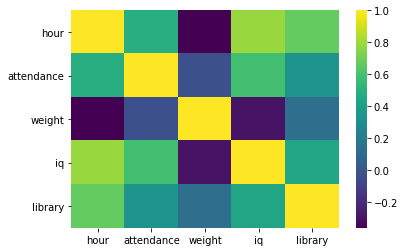

In [ ]:
sns.heatmap(corr, cmap='viridis')
plt.show()

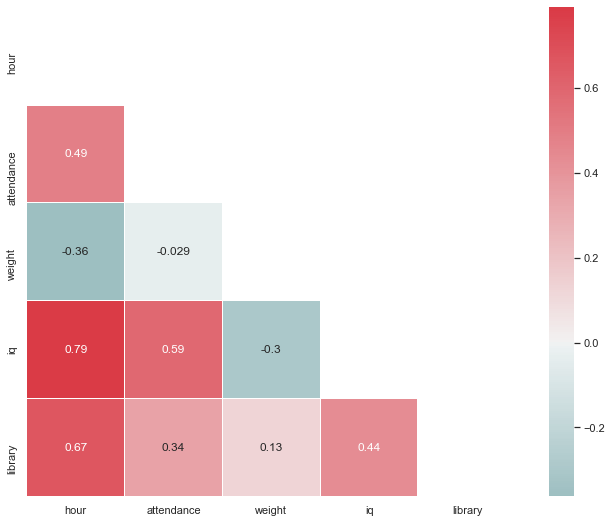

In [ ]:
sns.set(style="white")
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f,ax=plt.subplots(figsize=(12,9))
cmap=sns.diverging_palette(200,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,center=0,square=True,
            linewidths=0.5,cbar_kws={"shrink":1},annot=True);
#annot는 히트맵 안에 숫자 생성해주는 것
#글자 잘림은 subplots 사이즈 등 조절하면 쉽게 조절 가능

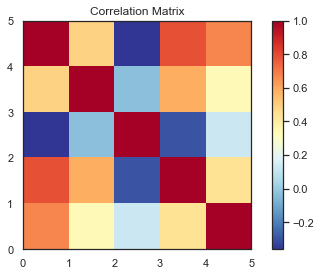

In [ ]:
# object형을 제외한 변수들간의 피어슨 상관관계!
df51=df5.iloc[:,[1,2,3,4,6]]
corr_matrix=np.corrcoef(df51.T)
smg.plot_corr(corr_matrix)
plt.show()

In [ ]:
# 변수간의 상관계수와 p값 계산
corr=df5.corr()
print(corr)
print(rp.corr_pair(df5[['hour','attendance','weight','iq','library']]))

                hour  attendance    weight        iq   library
hour        1.000000    0.492917 -0.362082  0.791026  0.673212
attendance  0.492917    1.000000 -0.029190  0.588915  0.341568
weight     -0.362082   -0.029190  1.000000 -0.295475  0.128588
iq          0.791026    0.588915 -0.295475  1.000000  0.436244
library     0.673212    0.341568  0.128588  0.436244  1.000000
                      r value p-value   N
hour & attendance      0.4929  0.1035  12
hour & weight         -0.3621  0.2474  12
hour & iq              0.7910  0.0022  12
hour & library         0.6732  0.0164  12
attendance & weight   -0.0292  0.9282  12
attendance & iq        0.5889  0.0439  12
attendance & library   0.3416  0.2772  12
weight & iq           -0.2955  0.3511  12
weight & library       0.1286  0.6904  12
iq & library           0.4362  0.1563  12


해석 : p값이 0.05보다 작은 값을 가지는 상관계수가 유의미하다고 할수 있음

## Ⅲ. 분산분석
- 2개의 모집단에 대한 평균을 비교, 분석하는 통계적 기법으로 t-Test를 활용하였다면, 비교하고자 하는 집단이 2개 이상일 경우에는 분산분석 (ANOVA : Analysis Of Variance)를 이용합니다. 
- 설명변수(=처치변수)는 범주형 자료(categorical data)이어야 하며, 종속변수는 연속형 자료(continuous data) 일 때 2개 이상 집단 간 평균 비교분석에 분산분석(ANOVA) 을 사용하게 됩니다.
- 분산분석(ANOVA)은 기본적으로 분산의 개념을 이용하여 분석하는 방법으로서, 집단간 평균의 차이가 크면 클수록, 집단내의 분산의 크기가 작을수록 집단간 평균의 차이가 분명해진다.(F통계량=間/內)  


> 1. 일원분산분석 : 처치변수 1개
> 2. RBD          : 블럭변수 1개 : 각 집단에 1개의 값만 있음/주효과만 분석
> 3. 이원분산분석 : 처치변수 2개 : 각 집단에 복수개의 값이 있음/ 주효과와 상호작용효과 모두 분석

그룹간 단순하게 F검정으로 분산 분석을 하는 방법과
Python의  scipy 모듈의 stats.f_oneway() 메소드를 사용하여 샘플의 크기가 서로 다른 3개 그룹 간 평균에 차이가 존재하는지 여부를 일원분산분석(one-way ANOVA)으로 분석하는 방법을 소개

> [ 분산분석  검정의 가정사항 (assumptions of ANOVA test) ]
>> -  (1) 독립성: 각 샘플 데이터는 서로 독립이다. 
>> -  (2) 정규성: 각 샘플 데이터는 정규분포를 따르는 모집단으로 부터 추출되었다. 
>> -  (3) 등분산성: 그룹들의 모집단의 분산은 모두 동일하다. 



### 3-1 일원분산분석(one-way ANOVA)
> - 한 처치변수의 수준변화가 결과변수에 미치는 영향력에 관한 것이다.
> - 2집단 이상의 평균비교에 사용
> - ttest와 결과 동일하며(2집단 평균비교시), t통계량의 제곱과 f통계량은 값이 같다.
> - statsmodel을 사용한 일원분산분석 주로 사용 
> - 가설의 설정
>> - 귀무가설 : 세 집단의 평균이 모두 같다.  
>> - 연구가설 : 세 집단의 평균이 모두 같지는 않다. 즉 적어도 하나는 다르다.

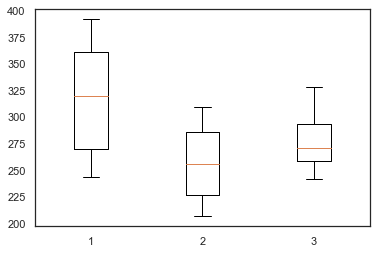

In [ ]:
# 심장우회수술을 받은 환자 대상으로 3가지 수준의 처치 이후 엽산수치 측정 자료
import urllib.request
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data6 = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data6[data6[:,1]==1,0]
group2 = data6[data6[:,1]==2,0]
group3 = data6[data6[:,1]==3,0]

# matplotlib plotting
plot_data = [group1, group2, group3]
ax = plt.boxplot(plot_data)
plt.show()

In [ ]:
# Statsmodel을 사용한 일원분산분석
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.DataFrame(data6, columns=['value', 'treatment'])  # DF화 하고 col명 붙여준다.
model = ols('value ~ C(treatment)', df).fit()             # the "C" indicates categorical data
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),2.0,15515.766414,7757.883207,3.711336,0.043589
Residual,19.0,39716.097222,2090.320906,NaN,NaN


In [ ]:
df.head()

,value,treatment
0,243.0,1.0
1,251.0,1.0
2,275.0,1.0
3,291.0,1.0
4,347.0,1.0


해석 : p값이 0.05보다 작으므로 귀무가설을 기각할 수 있고 따라서 집단간 평균 차이가 있다고 결론

### ※ 사후분석
- 분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 통계적으로 증명되었을 경우, 어떤 집단들에 대해서 평균의 차이가 존재하는지를 알아보기 위해 실시하는 분석
- 조합 가능한 모든 쌍에 대해 비교를 하므로 과잉검증으로 인한 FWER 증가
- 널리 쓰이는 봉페로니 교정과 투키의 HSD를 소개

In [ ]:
# #사후분석을 위한 준비
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats
comp = MultiComparison(df.value,df.treatment)

#### ① 봉페로니 교정
- Bonferroni correction
- 모든 집단을 짝지어 t-test
- 짝지어 비교를 3번 하면, p값을 3배
- FWER이 중간 정도
* FWER(family-wise error rates)이란, "전체 가설 set에서 하나라도 잘못 기각시킬 확률(제 1종오류, false positive)"을 말한다.

In [ ]:
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
print(result[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
   1.0    2.0  2.5582 0.0218    0.0655  False
   1.0    3.0  1.3266 0.2115    0.6346  False
   2.0    3.0 -1.0725 0.3046    0.9138  False
---------------------------------------------


해석 : 그룹 1,2간 p값이 0.05보다 작으므로 귀무가설을 기각할수 있고 따라서 그룹1,2간 차이가 있다고 할수 있으나 p값의 검정계수가 0.05보다 커 유의미한 수치가 아님. 따라서 전체적으로 집단간 차이가 없다는 귀무가설을 기각할 수 없음

#### ② 투키의 HSD 
- Tuckey's Honestly Significant Difference = "진정으로 유의미한 차이"
- FWER이 중간 정도

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(df['value'], df['treatment'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,2.0,-60.1806,0.0354,-116.6056,-3.7555,True
1.0,3.0,-38.625,0.3217,-104.8246,27.5746,False
2.0,3.0,21.5556,0.6706,-43.2141,86.3252,False


In [ ]:
# Scipy.stats으로 일원분산분석
F_statistic, pVal = stats.f_oneway(group1, group2, group3)
print(F_statistic, pVal)

3.7113359882669763 0.043589334959178244


### ※ stats.f_oneway 함수에 집단이 두개 들어가면 등분산성 검정을, 3개이상 들어가면 ANOVA분석(평균차이 검증)을 함

### 3-3 이원분산분석(two-way ANOVA)
> - 일원분산분석이 한 처치변수의 수준변화가 결과변수에 미치는 영향력에 관한 것이다.
> - 무작위블럭디장인은 한 처치변수의 수준변화가 결과변수에 미치는 영향력을 조사할  때 외생변수를 블럭으로 처리한 것이다. 그러므로 이 경우도 일원분산분석처럼 엄격히 말해 한 개의 처치변수의 효과를 조사한 것이다. 
> - 이와는 달리 동시에 두개의 처치변수의 수준변화에 따른 결과변수 효과를 조사하는 것
> - 처치효과로 주효과와 상호작용효로 나누어 볼수 있다
>> - 주효과 : 각 처치변수의 변화가 결과변수에 미치는 영향에 관한 것
>> - 상호작용효과 : 한 처치변수가 다른 처치변수의 변화에 따라 결과변수에 미치는 영향에 관한 것, 상호작용효과가 유의한 경우 주효과는 해석하지 않는다. 무의미한 경우 주효과를 해석한다. 

> - 해석
>> - 상호작용효과가 유의하지 않으면 주효과를 해석  
>> - 상호작용효과가 유의하면 주효과는 해석 않함

> - 예제 데이터(altman_12_6) 설명
>> - 태아의 머리 둘레 측정 데이터입니다. 4명의 관측자가 3명의 태아를 대상으로 3회씩 측정을 했습니다.  총 36회가 되는 셈이죠. 
>> - 관측자에 따라서 측정데이터가 영향을 받는지를 알아보는 것, 즉  초음파로 태아의 머리 둘레측정 데이터가 재현성이 있는지를 조사하는 것

<AxesSubplot:title={'center':'head_size'}, xlabel='fetus'>

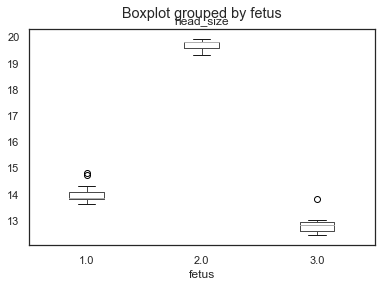

In [ ]:
inFile = 'altman_12_6.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data7 = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Bring them in dataframe-format
df7 = pd.DataFrame(data7, columns=['head_size', 'fetus', 'observer'])
# df7.tail()

# 태아별 머리 둘레 plot 만들기
df7.boxplot(column = 'head_size', by='fetus' , grid = False)

In [ ]:
df7.head()

,head_size,fetus,observer
0,14.3,1.0,1.0
1,14.0,1.0,1.0
2,14.8,1.0,1.0
3,13.6,1.0,2.0
4,13.6,1.0,2.0


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'head_size ~ C(fetus) + C(observer) + C(fetus):C(observer)'
model2 = ols(formula, df7).fit()
table=anova_lm(model2)
print(table)

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN


- 상호작용효과인 "C(fetus):C(observer)"의 P-value 가 0.05 이상입니다, 따라서 귀무가설을 기각할 수 없고. 즉 측정자와 태아와의 상호작용효과가 없고 따라서 머리둘레값에는 영향을 주지 않는다고 할 수 있습니다. 태아에 따라 측정하는 사람이 달라져도 머리 둘레값은 일정하는 것이죠.
- 결론적으로 초음파로 측정하는 태아의 머리둘레값은 믿을 수 있다는 것입니다.

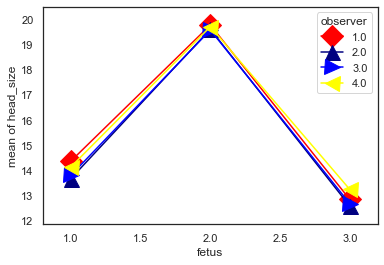

In [ ]:
# 상호작용효과 그래프

from statsmodels.graphics.factorplots import interaction_plot
fig=interaction_plot(df7.fetus,df7.observer,df7.head_size, colors=['red','navy','blue','yellow'],
                     markers=['D','^','>','<'],ms=15)

# markers : ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

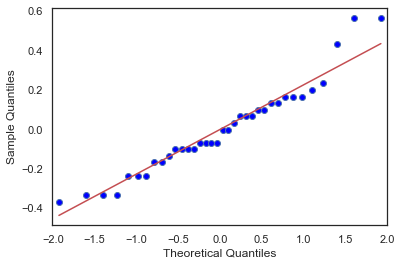

In [ ]:
# 잔차의 정규분포가정을 검증하기 위해 누적확률분포와 정규분포의 산포도를 그려 봄
import statsmodels.api as sm
res=model2.resid
qq=sm.qqplot(res,line='s')
plt.show()

잔차의 형태가 대각선 직선의 형태를 지니고 있으면 잔차가 정규분포라고 할수 있다. 

##  예제 (이학식 마케팅 조사론 p321) : 성별과 여행빈도가 해외여행태도에 미치는 영향 조사
>> -  여행빈도 3범주 , 남녀 나눠 조사. 총 30명
>> - 성별(남 1, 여2), 여행빈도(적음 1, 중간 2, 많음 3), 해외여행 태도( 전혀 좋아하지 않음 1, 매우 좋아함 9)

>> - 여행빈도에 대한 가설 : 주효과1
>>> - 귀무가설 : 여행빈도별 평균 태도점수 차이없다,(Mu1=Mu2=Mu3)
>>> - 대립가설 : 어느 하나라도 평균태도 점수에 차이가 있다.
>> - 2가지 성별에 대한 가설 : 주효과2
>>> - 귀무가설 : 성별 평균 태도점수 차이없다,(Mu남=Mu여)
>>> - 대립가설 : 남녀의 평균태도 점수에 차이가 있다.
>> - 여행빈도와 성별간에 대한 가설 : 상호작용효과
>>> - 귀무가설 : 상호작용효과 없다
>>> - 대립가설 : 상호작용효과 있다..

In [ ]:
b=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2],
   [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3],
   [2,3,4,4,2,4,5,5,3,3,8,9,8,7,7,6,7,6,5,7,3,4,5,4,5,6,6,6,7,8]]
df10=pd.DataFrame(b)
df11=df10.T
df11.columns=['sex','freq','points']
df11.head()

,sex,freq,points
0,1,1,2
1,1,1,3
2,1,1,4
3,1,1,4
4,1,1,2


<AxesSubplot:title={'center':'points'}, xlabel='freq'>

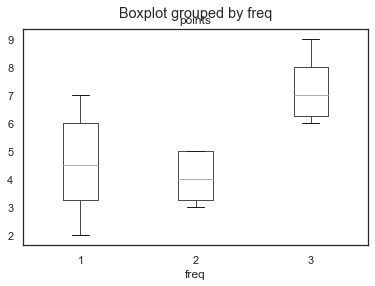

In [ ]:
# 여행빈도별 태도점수 plot 만들기
df11.boxplot(column = 'points', by='freq' , grid = False)

<AxesSubplot:title={'center':'points'}, xlabel='sex'>

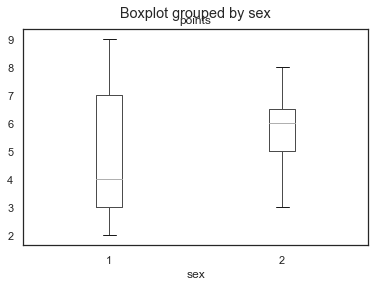

In [ ]:
# 남녀별 태도점수 plot 만들기
df11.boxplot(column = 'points', by='sex' , grid = False)

In [ ]:
df11.groupby(['sex','freq']).agg(['mean','std'])

points          
           mean       std
sex freq                 
1   1       3.0  1.000000
    2       4.0  1.000000
    3       7.8  0.836660
2   1       6.2  0.836660
    2       4.2  0.836660
    3       6.6  0.894427

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'points ~ C(freq) + C(sex) + C(freq):C(sex)'
model4 = ols(formula, df11).fit()
table=anova_lm(model4)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(freq),2.0,55.400000,27.700000,33.918367,1.014700e-07
C(sex),1.0,4.033333,4.033333,4.938776,3.593950e-02
C(freq):C(sex),2.0,25.266667,12.633333,15.469388,4.830446e-05
Residual,24.0,19.600000,0.816667,NaN,NaN


#### -  유의수준 0.05에서 p값이 거의 0(4.830446e-05)이므로 귀무가설은 기각되고 따라서 상호작용효과가 있는 것으로 결론

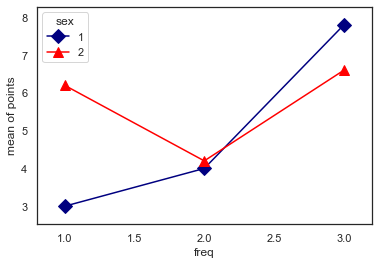

In [ ]:
# 상호작용효과 그래프

from statsmodels.graphics.factorplots import interaction_plot
fig=interaction_plot(df11.freq,df11.sex,df11.points, colors=['navy','red'],
                     markers=['D','^'],ms=10)

#### - 남녀간의 기울기 다르므로 상호작용효과가 있다. 여행빈도가 적을 때는 남녀간 태도차이가 크게 나타나나 빈도가 많아지면서 차이가 적어짐 남성의 경우 빈도가 많을수록 긍정적 태도가 비례적으로 증가

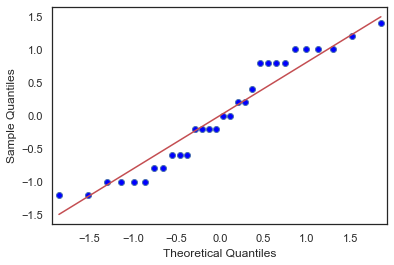

In [ ]:
# 잔차의 정규분포가정을 검증하기 위해 누적확률분포와 정규분포의 산포도를 그려 봄
import statsmodels.api as sm
res=model4.resid
qq=sm.qqplot(res,line='s')
# plt.show()

### 3-4 공분산분석(ANCOVA) : analysis of covariance
- 실험을 할 때 모든 집단들이 동일조건에서 출발하도록 통제하지 않으면 집단 자료들을 비교한 결과로 부터 정확한 통계적 의미를 기대하기 어려움
>- 예: 3가지 교수법 효과를 검증하기 위해 세 그룹에 대해 처치함에 있어 세 그룹간 iq의 차이가 뚜렷하다면 여기서 나타난 처치효과가 iq때문인지 교수버 차이때문인지 애매할 수 있다. 
- 외생변수를 공변량(covariate)으로 처리한 후 각 그룹의 종속변수간 값의 차이가 있는지를 조사
- 공변량 : 종속변수에 영향을 미칠 수 있으나 독립변수로 설정되지 않은 변수
- 이원분산 분석과의 차이
>- anova 경우 독립변수 2개가 모두 명목
>- ancova 경우 : 독립변수 1개 : 명목, 공변량은 등간이나 비율

In [ ]:
#create data
df1 = pd.DataFrame({'technique': np.repeat(['A', 'B', 'C'], 5),
                   'current_grade': [67, 88, 75, 77, 85,
                                     92, 69, 77, 74, 88, 
                                     96, 91, 88, 82, 80],
                   'exam_score': [77, 89, 72, 74, 69,
                                  78, 88, 93, 94, 90,
                                  85, 81, 83, 88, 79]})
df1

,technique,current_grade,exam_score
0,A,67,77
1,A,88,89
2,A,75,72
3,A,77,74
4,A,85,69
5,B,92,78
6,B,69,88
7,B,77,93
8,B,74,94
9,B,88,90


- Factor variable: studying technique
- Covariate: current grade
- Response variable: exam score
- 공부하는 방법(technique)에 따라 시험점수가 달라지는가? 노이즈(공변량)로 현재학점 

In [ ]:
# !pip install pingouin 

In [ ]:
from pingouin import ancova

#perform ANCOVA
ancova(data=df1, dv='exam_score', covar='current_grade', between='technique')

,Source,SS,DF,F,p-unc,np2
0,technique,390.575130,2,4.809973,0.031556,0.466536
1,current_grade,4.193886,1,0.103296,0.753934,0.009303
2,Residual,446.606114,11,NaN,NaN,NaN


#### 해석
- 기술종류의 p-value (p-unc = “uncorrected p-value”)가 0.03으로 유의수준 0.05보다 작다. 
- 따라서, 우리는 기술종류에 따라 시험성적에 차이가 없다 라는 귀무가설을 기각할수 있다.
- 부연하면, 공변량인 현재학점을 감안하더라도 기술종류에 따라 시험성적에 차이가 있다라고 할수 있다.